# A1: Unsupervised Analysis Project

**Course: Introdution to Machine Learning**

# Introduction to Analysis 

Visual content has always been at the forefront of engagement methods in the 
ever-changing world of social media, using its natural attraction to draw in 
and hold users attention. It is more important to validate and improve our ideas 
using real-world data and cutting-edge analytics as the digital landscape changes further.

This project, which focuses on the Thai market, seeks to ascertain whether visual content is 
more effective than text or videos at drawing consumers in. Through the examination of engagement 
measures like likes, shares, comments, and emotional responses, we want to gain a comprehensive 
knowledge of the performance of various forms of material.

Principal Component Analysis (PCA), clustering, logistic regression models, and statistical analysis 
are used in this work to try and provide a comprehensive knowledge of the dynamics of social media participation. 
The informative information provided here will be beneficial to marketers and content creators.

The findings of this study will provide marketers and content creators with a comprehensive grasp 
of the dynamics involved in social media interaction. By using these findings to enhance 
audience engagement and content strategy, we can be sure that our techniques are effective and based on data

***Importing Necessary Packages and Data***

In [1]:
# importing packages

import numpy                   as np
import pandas                  as pd
import matplotlib.pyplot       as plt
import seaborn                 as sns
import statsmodels.formula.api as smf # logistic regression
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler # standard scaler
from sklearn.decomposition import PCA            # pca


# packages for unsupervised learning

from scipy.cluster.hierarchy import dendrogram, linkage # dendrograms
from sklearn.cluster         import KMeans              # k-means clustering
from sklearn.model_selection import train_test_split        # train-test split
from sklearn.metrics import confusion_matrix, roc_auc_score # results analysis
import sklearn.linear_model                                 # classification modeling


In [2]:
# reading data into Python
file = './facebook_live_data.xlsx'

# calling this fbk_data
fbk_data= pd.read_excel(file)




# setting print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)

#checking data set
fbk_data.head(n = 10)

,status_id,status_type,time_published,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1,photo,2023-07-04 22:45:00,0,0,150,0,0,0,0,0
1,2,photo,2023-06-23 01:01:00,2,3,202,7,1,0,0,0
2,3,photo,2023-06-21 02:23:00,4,0,200,8,1,0,0,0
3,4,video,2023-06-14 05:16:00,100,30,303,23,1,5,0,0
4,5,video,2023-06-08 08:28:00,173,47,132,16,1,0,1,0
5,6,photo,2023-06-03 08:40:00,15,1,221,12,1,0,0,0
6,7,video,2023-06-01 22:34:00,0,1,37,0,0,0,0,0
7,8,photo,2023-05-22 05:55:00,0,0,81,2,2,0,0,0
8,9,photo,2023-05-18 02:48:00,8,0,281,11,1,0,0,0
9,10,photo,2023-05-13 01:43:00,11,6,61,4,1,0,0,0


***User Define Function***

In [3]:
########################################
# scree_plot
########################################
def scree_plot(pca_object, export = False):
    """
    Visualizes a scree plot from a pca object.
    
    PARAMETERS
    ----------
    pca_object | A fitted pca object
    export     | Set to True if you would like to save the scree plot to the
               | current working directory (default: False)
    """
    # building a scree plot

    # setting plot size
    fig, ax = plt.subplots(figsize=(10, 8))
    features = range(pca_object.n_components_)


    # developing a scree plot
    plt.plot(features,
             pca_object.explained_variance_ratio_,
             linewidth = 2,
             marker = 'o',
             markersize = 10,
             markeredgecolor = 'black',
             markerfacecolor = 'grey')
    plt.step(features, 
             pca_object.explained_variance_ratio_, 
             where = 'mid', 
             label = 'Cumulative explained variance')



    # setting more plot options
    plt.title('Scree Plot')
    plt.xlabel('PCA feature')
    plt.ylabel('Explained Variance')
    plt.xticks(features)
    plt.axvline(x         = 2,
                color     = 'red',
                linestyle = '--',
                label     = 'cut-off point')
    plt.legend()

    if export == True:
    
        # exporting the plot
        plt.savefig('./analysis_images/top_customers_correlation_scree_plot.png')
        
    # displaying the plot
    plt.show()


########################################
# unsupervised_scaler
########################################
def scaler(df):
    """
    Standardizes a dataset (mean = 0, variance = 1). Returns a new DataFrame.
    Requires sklearn.preprocessing.StandardScaler()
    
    PARAMETERS
    ----------
    df     | DataFrame to be used for scaling
    """

    # INSTANTIATING a StandardScaler() object
    scaler = StandardScaler(copy = True)


    # FITTING the scaler with the data
    scaler.fit(df)


    # TRANSFORMING our data after fit
    x_scaled = scaler.transform(df)

    
    # converting scaled data into a DataFrame
    new_df = pd.DataFrame(x_scaled)


    # reattaching column names
    new_df.columns = list(df.columns)
    
    return new_df

 ***Exploratory Data Analysis (EDA)***

In [4]:
# checking information about each column

fbk_data.info(verbose = True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2362 entries, 0 to 2361
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   status_id       2362 non-null   int64         
 1   status_type     2362 non-null   object        
 2   time_published  2362 non-null   datetime64[ns]
 3   num_comments    2362 non-null   int64         
 4   num_shares      2362 non-null   int64         
 5   num_likes       2362 non-null   int64         
 6   num_loves       2362 non-null   int64         
 7   num_wows        2362 non-null   int64         
 8   num_hahas       2362 non-null   int64         
 9   num_sads        2362 non-null   int64         
 10  num_angrys      2362 non-null   int64         
dtypes: datetime64[ns](1), int64(9), object(1)
memory usage: 203.1+ KB


In [5]:
#checking for Null values in the dataset

fbk_data.isna().sum()

status_id         0
status_type       0
time_published    0
num_comments      0
num_shares        0
num_likes         0
num_loves         0
num_wows          0
num_hahas         0
num_sads          0
num_angrys        0
dtype: int64

In [6]:
# value counts for status  type
print(f"""\

-------
{fbk_data['status_type'].value_counts(normalize=False).to_string(buf=None)}

""")


-------
status_type
photo    1443
video     763
text      156




In [8]:
# Define the engagement columns 
engagement_columns = ['num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']

# Calculate the total engagement by summing specific engagement columns
fbk_data['total_engagement'] = fbk_data[engagement_columns].sum(axis=1)

# Group by 'status_type' and sum the engagement metrics
grouped_data = fbk_data.groupby('status_type')[engagement_columns + ['total_engagement']].sum()

# Print the grouped data to see which type of content leads in total engagement and specific reactions
print(grouped_data)

             num_comments  num_shares  num_likes  num_loves  num_wows  num_hahas  num_sads  num_angrys  total_engagement
status_type                                                                                                             
photo               31796        4385     253180       2009       983        168       239          78            292838
text                 5898         517      72918        189       134         20        40           2             79718
video              514376       89158     196253      28100      1912       1560       336         210            831905


***Analysis of Engagement Metrics:***

***Total Engagement***: With 831,905 interactions, videos lead all other media in terms of engagement. 
This is notably higher than text (79,718) and photos (292,838). This shows that, 
in terms of the volume of interactions, videos are the most engaging content category.

***Comments and Shares***: Compared to photographs (31,796 comments; 4,385 shares) and text postings 
(5,898 comments; 517 shares), videos lead significantly in comments (514,376) and shares (89,158), 
indicating that they are more likely to spark conversation and be shared among users.

***Likes and Loving***: Pictures get a lot of likes (253,180), somewhat more than videos (196,253) 
but significantly more than text posts (72,918). On the other hand, videos garner 28,100 
loves as opposed to 2,009 for photographs and 189 for text.


***Other Reactions***: Wows (1,912), Hahas (1,560), Sads (336), and Angrys (210) are the most common reactions to videos, all of which indicate high levels of emotional engagement. Text submissions and photos get far fewer of these responses.



***Engagement Scope***: Because of their immersive properties, videos are the most engaging content across all parameters, demonstrating their capacity to draw in and hold users' attention.

***Text vs Photos***: Though they fall short of videos in terms of performance, photos routinely outperform text in terms of engagement and user interest.

***Strategic Advice***: Videos are the best way to get the most interaction. Still, pictures are still useful for getting likes, which shows that people find them engaging for more passive communication. Text posts are the least interesting, but they are necessary for making points very plain and concise.





In [9]:
#convert the status_type column into a binary variable
#photo=1
#video=0
#text=0

fbk_data["status_type"] = (fbk_data['status_type'] == 'photo').astype(int)

In [10]:
# dropping information which is not used for PCA analysis

fbk_ori = fbk_data.drop(["status_id","status_type","time_published","total_engagement"],
                       axis=1)

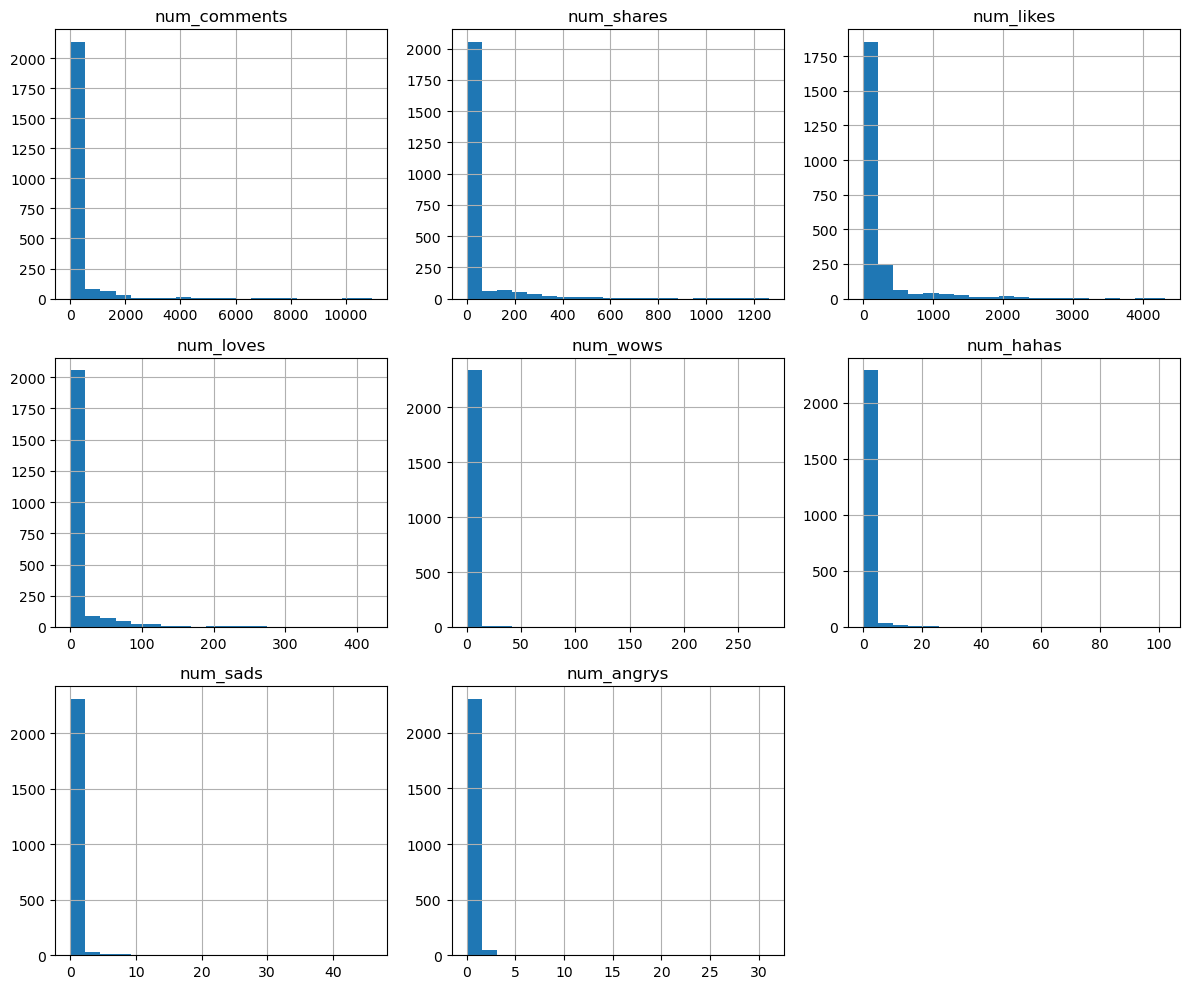

In [11]:
# Visualize distributions of numerical features
fbk_ori.hist(figsize = (12, 10),
             bins    = 20)
plt.tight_layout()
plt.show()

In [12]:
# scaling (normalizing) variables before correlation analysis
fbk_scaled = scaler(df =fbk_ori)


# checking pre- and post-scaling variance
print(np.var(fbk_ori), '\n\n')
print(np.var(fbk_scaled))

num_comments    733040.526533
num_shares       15315.110634
num_likes       218288.813477
num_loves         1680.086166
num_wows            75.978259
num_hahas           16.896863
num_sads             3.392409
num_angrys           0.817271
dtype: float64 


num_comments    1.0
num_shares      1.0
num_likes       1.0
num_loves       1.0
num_wows        1.0
num_hahas       1.0
num_sads        1.0
num_angrys      1.0
dtype: float64


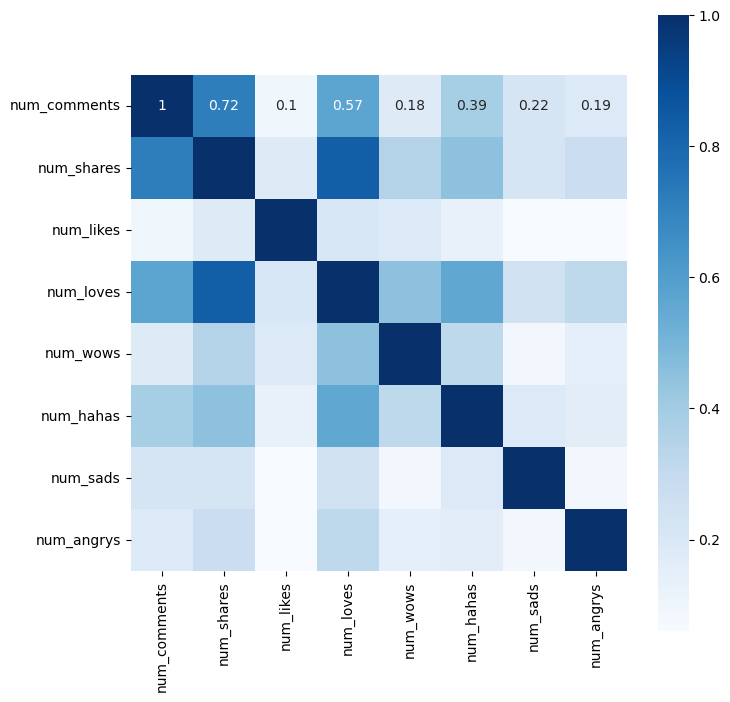

In [13]:
# setting plot size
fig, ax = plt.subplots(figsize = (8, 8))


# developing a correlation matrix object
df_corr =fbk_scaled.corr(method = 'pearson').round(decimals = 2)


# creating a correlation heatmap
sns.heatmap(data   = df_corr,
            cmap   = 'Blues',
            square = True,
            annot  = True)


# rendering the heatmap
plt.show()

# Principal Component Analysis (PCA)

Large datasets can be made less dimensional by using principle Component Analysis (PCA), a statistical technique that splits the original dataset into a new set of variables known as principle components. These elements simplify the analysis while maintaining important patterns and trends by capturing the most significant variance in the data with fewer variables.



In [14]:
# INSTANTIATING a PCA object with no limit to principal components
pca = PCA(n_components = None,
          random_state = 702)


# FITTING and TRANSFORMING the scaled data
fbk_pca = pca.fit_transform(fbk_scaled)


# comparing dimensions of each DataFrame
print("Original shape:", fbk_scaled.shape)
print("PCA shape     :", fbk_pca.shape)

Original shape: (2362, 8)
PCA shape     : (2362, 8)


In [15]:
# component number counter
component_number = 0


# looping over each principal component
for variance in pca.explained_variance_ratio_:
    component_number += 1
    print(f"PC {component_number}: {variance.round(3)}")
    
# printing the sum of all explained variance ratios
print(f"""explained_varainace
{(pca.explained_variance_ratio_.sum(axis = 0))}""")

PC 1: 0.409
PC 2: 0.128
PC 3: 0.115
PC 4: 0.11
PC 5: 0.1
PC 6: 0.077
PC 7: 0.045
PC 8: 0.017
explained_varainace
1.0000000000000002


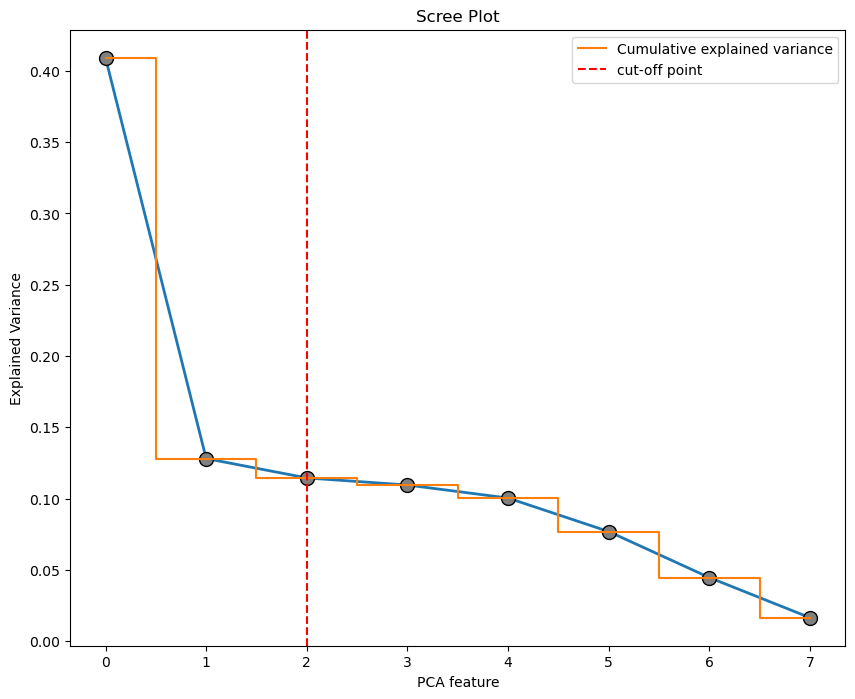

In [16]:
# calling the scree_plot function now
scree_plot(pca_object = pca)

***Retaining the first three principal components PC0, PC1, and PC2***


***Elbow Method***: The scree plot shows a "elbow," or a point where the explained 
variance begins to level off, signifying that the variability of the data is captured by the subsequent principal components less drastically. The elbow follows the third main component, which supports the keeping of PC0, PC1, and PC2.

***Explained Variance***: About 65.2% of the variance is explained by the first three components (PC0: 40.9%, PC1: 12.8%, and PC2: 11.5%) taken combined. By keeping these elements, it is possible to maintain most of the information without unduly cluttering the model with further elements that contribute progressively less to the explained variance.


A three-component model balances complexity with interpretability, making the patterns in the data easier to understand and apply

In [17]:
# transposing pca components
factor_loadings_df = pd.DataFrame(np.transpose(pca.components_.round(decimals = 2)))


# naming rows as original features
factor_loadings_df = factor_loadings_df.set_index(fbk_scaled .columns)


# checking the result
print(factor_loadings_df)

                 0     1     2     3     4     5     6     7
num_comments  0.41 -0.31 -0.03 -0.20 -0.39 -0.18  0.67 -0.24
num_shares    0.49 -0.12  0.05 -0.17 -0.21 -0.22 -0.33  0.71
num_likes     0.16  0.73 -0.35  0.25 -0.49  0.11  0.05  0.00
num_loves     0.50  0.00  0.06 -0.08  0.01 -0.06 -0.56 -0.65
num_wows      0.30  0.48  0.08 -0.08  0.64 -0.42  0.29  0.04
num_hahas     0.37  0.01 -0.05 -0.20  0.28  0.84  0.14  0.12
num_sads      0.20 -0.35 -0.68  0.54  0.27 -0.09 -0.01  0.03
num_angrys    0.22 -0.04  0.63  0.72 -0.04  0.11  0.11  0.04


In [18]:
# naming each principal component
factor_loadings_df.columns = ['High Engagement',       # +ve(num_comments, num_shares, num_loves, num_wows, and num_hahas)
                              'Positive Reaction',     # +ve(num_likes,num_wows,) and  -ve(num_sads)
                              'Negative Emotion',      # +ve(num_angrys) and -ve(num_sads)
                              '3',                     # after elbow
                              '4',                     
                              '5',
                              '6',
                              '7']      


# checking the result
factor_loadings_df

,High Engagement,Positive Reaction,Negative Emotion,3,4,5,6,7
num_comments,0.41,-0.31,-0.03,-0.20,-0.39,-0.18,0.67,-0.24
num_shares,0.49,-0.12,0.05,-0.17,-0.21,-0.22,-0.33,0.71
num_likes,0.16,0.73,-0.35,0.25,-0.49,0.11,0.05,0.00
num_loves,0.50,0.00,0.06,-0.08,0.01,-0.06,-0.56,-0.65
num_wows,0.30,0.48,0.08,-0.08,0.64,-0.42,0.29,0.04
num_hahas,0.37,0.01,-0.05,-0.20,0.28,0.84,0.14,0.12
num_sads,0.20,-0.35,-0.68,0.54,0.27,-0.09,-0.01,0.03
num_angrys,0.22,-0.04,0.63,0.72,-0.04,0.11,0.11,0.04


***Three Principal Components Interpretation***

***High Engagement***
This component appears to reflect the quantity and diversity of involvement, as seen by its significant positive loadings on the following metrics: 'num_comments' (0.41), 'num_shares' (0.49), 'num_loves' (0.50), 'num_wows' (0.30), and 'num_hahas' (0.37). High scoring posts are likely to receive a lot of comments and shares, indicating that they are interesting and elicit a robust, engaged response from the audience.It can be characterized as the "High Engagement" component

***Positive Reaction***
The second component, which indicates the overall favorable reception of a post, is inversely associated with 'num_sads' (-0.35) and positively associated with 'num_likes' (0.73) and 'num_wows' (0.48).This could be termed 
as "Positive Reaction"component.

***Neagitve Emotion***
The third component has a substantial negative loading on 'num_sads' (-0.68) and a considerable positive loading on 'num_angrys' (0.63), which may suggest that it contains information that provokes strong negative emotions in the audience and may be controversial or provocative.We could call this as " Neagitve Emotion" component.





In [19]:
# converting into a DataFrame 
fbk_pca = pd.DataFrame(fbk_pca)


# renaming columns
fbk_pca.columns = factor_loadings_df.columns


# checking results
fbk_pca

,High Engagement,Positive Reaction,Negative Emotion,3,4,5,6,7
0,-0.619670,-0.006476,0.031211,-0.028140,0.069438,0.030553,0.011254,-0.000399
1,-0.469623,0.126667,0.013848,-0.028868,0.082735,-0.020934,-0.053784,-0.088186
2,-0.469004,0.125796,0.015559,-0.028346,0.089355,-0.017813,-0.058132,-0.121798
3,0.367677,0.240069,-0.089732,-0.314233,0.234662,0.932251,-0.089207,-0.068756
4,-0.019679,-0.278149,-0.276109,0.109002,0.151739,-0.213950,-0.170986,-0.007108
...,...,...,...,...,...,...,...,...
2357,-0.430884,0.084652,-0.004706,-0.030780,-0.039773,0.007068,-0.111433,-0.051283
2358,-0.667096,-0.222189,0.133994,-0.100760,0.215334,-0.003407,-0.002229,-0.001872
2359,-0.668470,-0.228442,0.136973,-0.102865,0.219563,-0.004391,-0.002620,-0.001914
2360,-0.669158,-0.231568,0.138463,-0.103917,0.221677,-0.004884,-0.002815,-0.001936


In [20]:
#distribution of social media posts across the three principal components that were identified through PCA

print(f""" High Engagement 
{len(fbk_pca['High Engagement'][fbk_pca['High Engagement'] > 1.0])}

Positve Reaction
{len(fbk_pca['Positive Reaction'][fbk_pca['Positive Reaction'] > 1.0])}

Negative Emotion
{len(fbk_pca['Negative Emotion'][fbk_pca['Negative Emotion'] > 1.0])}

""")

 High Engagement 
269

Positve Reaction
179

Negative Emotion
43




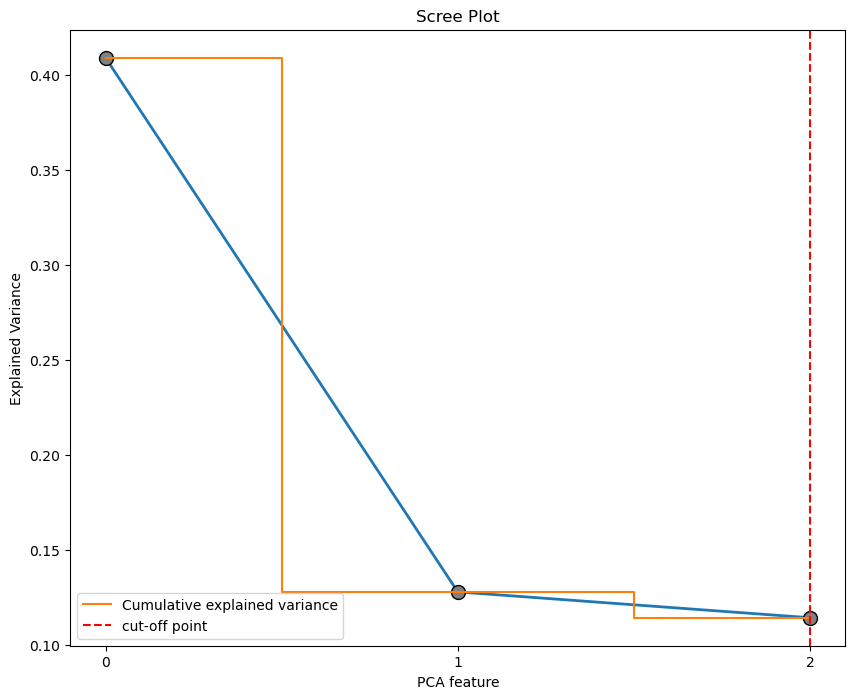

In [21]:
# INSTANTIATING a new model using the first three principal components
pca_3 = PCA(n_components = 3,
            random_state = 702)


# FITTING and TRANSFORMING the purchases_scaled
fbk_pca_3 = pca_3.fit_transform(fbk_scaled)


# calling the scree_plot function
scree_plot(pca_object = pca_3,
           export     = False)

In [22]:
##################
### 3 PC Model ###
##################
# transposing pca components (pc = 3)
factor_loadings_3 = pd.DataFrame(np.transpose(pca_3.components_))


# naming rows as original features
factor_loadings_3 = factor_loadings_3.set_index(fbk_scaled.columns)
# naming each principal component
factor_loadings_3.columns = ['High Engagement',         # +ve(num_comments, num_shares, num_loves, num_wows, and num_hahas)
                              'Positive Reaction',      # +ve(num_likes,num_wows,) and  -ve(num_sads)
                              'Negative Emotion'        # +ve(num_angrys) and -(num_sads)
                              ]      


# checking the result
factor_loadings_3.round(decimals = 2)

,High Engagement,Positive Reaction,Negative Emotion
num_comments,0.41,-0.31,-0.03
num_shares,0.49,-0.12,0.05
num_likes,0.16,0.73,-0.35
num_loves,0.50,0.00,0.06
num_wows,0.30,0.48,0.08
num_hahas,0.37,0.01,-0.05
num_sads,0.20,-0.35,-0.68
num_angrys,0.22,-0.04,0.63


In [23]:
# converting fbk data into DataFrame
fbk_pca_3 = pd.DataFrame(fbk_pca_3)


# renaming data
fbk_pca_3.columns = list(factor_loadings_3.columns)


# checking factor loadings per customer
fbk_pca_3.head(n = 10)

,High Engagement,Positive Reaction,Negative Emotion
0,-0.619670,-0.006476,0.031211
1,-0.469623,0.126667,0.013848
2,-0.469004,0.125796,0.015559
3,0.367677,0.240069,-0.089732
4,-0.019679,-0.278149,-0.276109
5,-0.403725,0.153926,0.006237
6,-0.654551,-0.184083,0.115799
7,-0.551121,-0.004078,0.104165
8,-0.402630,0.251152,-0.040213
9,-0.538502,-0.100086,0.115163


In [24]:
# checking variance amongst clusters
np.var(fbk_pca_3)

High Engagement      3.273609
Positive Reaction    1.025052
Negative Emotion     0.916344
dtype: float64

# K-means Cluster

Using the principle component analysis (PCA) insights as a guide, we have implemented k-means clustering in our study to identify discrete parts within social media content. Three main groupings have been naturally identified through the use of a dendrogram; these groups correspond to different patterns of audience involvement. An grasp of the various interaction landscapes—from content that polarizes to that which resonates universally—is made easier by this strategic categorization. The resulting clusters avoid subdivisions that are too narrow for real-world use, reflecting a balance between coherence and specificity.



In [25]:
# applying the unsupervised_scaler function
pca_rescaled = scaler(df =fbk_pca_3 )


# checking pre- and post-scaling variance
print(np.var(fbk_pca_3), '\n\n')
print(np.var(pca_rescaled))

High Engagement      3.273609
Positive Reaction    1.025052
Negative Emotion     0.916344
dtype: float64 


High Engagement      1.0
Positive Reaction    1.0
Negative Emotion     1.0
dtype: float64


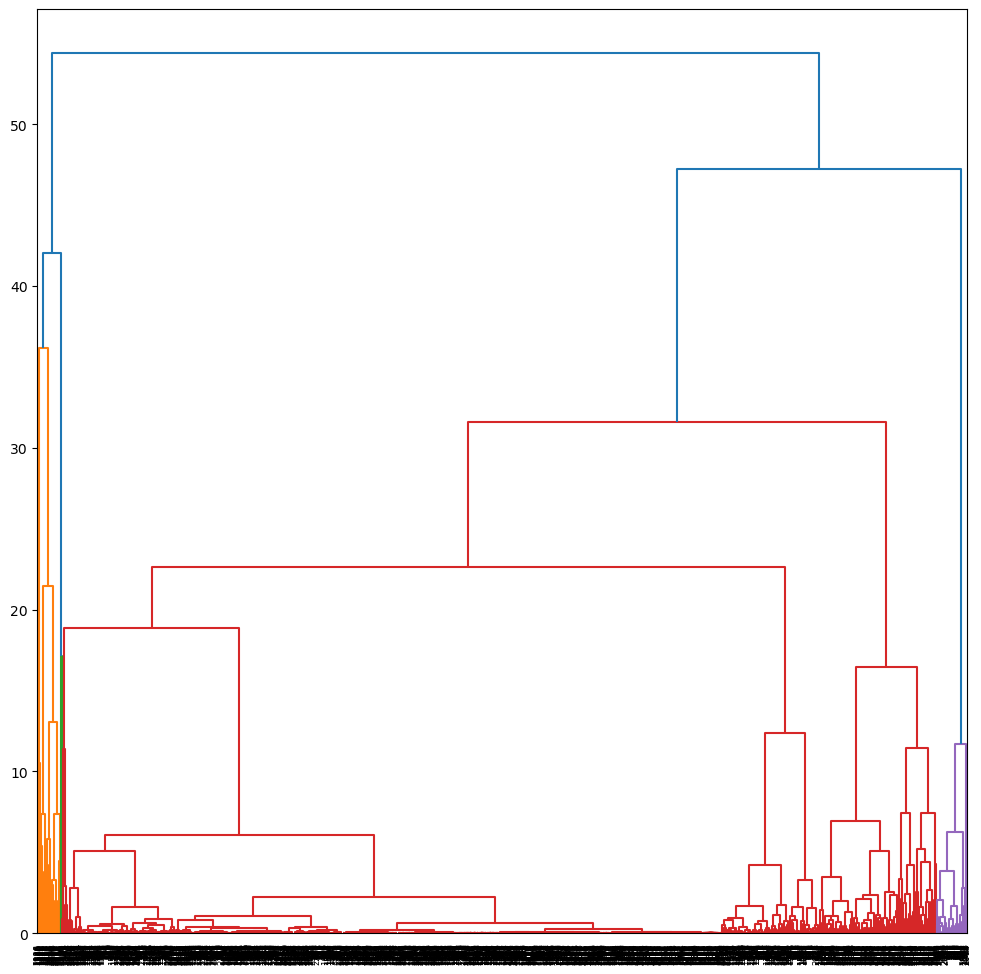

In [26]:
# grouping data based on Ward distance
standard_mergings_ward = linkage(y = pca_rescaled,
                                 method = 'ward',
                                 optimal_ordering = True)


# setting plot size
fig, ax = plt.subplots(figsize=(12, 12))

# developing a dendrogram
dendrogram(Z = standard_mergings_ward,
           leaf_rotation  = 90       ,
           leaf_font_size = 6        )


# rendering the plot
plt.show()

In [27]:
# INSTANTIATING a k-Means object with clusters
fbk_k_pca = KMeans(n_clusters   = 3,
                   n_init       = 'auto',
                   random_state = 702   )


# fitting the object to the data
fbk_k_pca.fit(pca_rescaled)


# converting the clusters to a DataFrame
fbk_kmeans_pca = pd.DataFrame({'Cluster': fbk_k_pca.labels_})


# checking the results
print(fbk_kmeans_pca.iloc[: , 0].value_counts())

Cluster
1    2138
0     135
2      89
Name: count, dtype: int64


In [28]:
# storing cluster centers
centroids_pca =fbk_k_pca.cluster_centers_


# converting cluster centers into a DataFrame
centroids_pca_df = pd.DataFrame(centroids_pca).round(decimals = 2)


# renaming principal components
centroids_pca_df.columns = ['High Engagement',
                             'Positive Reaction',
                             'Negative Emotion']


# checking results (clusters = rows, pc = columns)
centroids_pca_df

,High Engagement,Positive Reaction,Negative Emotion
0,0.41,2.94,-1.09
1,-0.18,-0.13,0.10
2,3.77,-1.40,-0.78


***Interpretation of Clusters***

***cluster 0- Positive Engagers***

With the greatest positive scores in "Positive Reaction" and negative scores in "Negative Emotion," this cluster stands out and suggests that these postings are very well-received and rarely elicit negative responses.

***Features***: Content that receives praise and admiration, including inspirational tales or eye-catching photos, is probably posted here.

An example of a typical post may be an image that is visually appealing and has a positive message. It would receive a lot of likes and shares.


***cluster 1 -"Neutral Content"***

Posts in this cluster show a more muted overall audience reaction, with slightly positive ratings in "Negative Emotion" and moderately negative scores in "High Engagement" and "Positive Reaction."

***Features***: This cluster's content could contain common posts that don't elicit a lot of positive interaction or provoke negative feelings.

An example might be a routine update or a typical informational text post that receives minimal participation and is not met with much attention or controversy.


***cluster 2 -"Hot Topics"***

This cluster is distinguished by extremely high "High Engagement" scores and low "Positive Reaction" and "Negative Emotion" scores. It stands for extremely engaging material that frequently sparks controversy or dispute and divides viewer opinion.

***Features***:Posts may cover contentious issues or divisive viewpoints that elicit a wide range of responses in the form of comments and shares.

An example would be a post that provokes a contentious conversation with lots of likes and comments, where individuals argue or provide strong perspectives.

In [30]:
# concatenating cluster memberships with principal components
clst_pca_df = pd.concat([fbk_kmeans_pca,
                         fbk_pca_3 ],
                         axis = 1)


# concatenating "status_id","status_type","time_published" information with pca-clusters
final_df = pd.concat([fbk_data.loc[ : , ['status_id', 'status_type', 'time_published']],
                      clst_pca_df.round(decimals = 2)],
                      axis = 1)


# renaming columns
final_df.columns = ['status_id', 'status_type', 'time_published', 'Cluster',
                    'High Engagement',
                    'Positive Reaction',
                    'Negative Emotion'
                   ]


# checking the results
print(final_df.head(n = 20))

    status_id  status_type      time_published  Cluster  High Engagement  Positive Reaction  Negative Emotion
0           1            1 2023-07-04 22:45:00        1            -0.62              -0.01              0.03
1           2            1 2023-06-23 01:01:00        1            -0.47               0.13              0.01
2           3            1 2023-06-21 02:23:00        1            -0.47               0.13              0.02
3           4            0 2023-06-14 05:16:00        1             0.37               0.24             -0.09
4           5            0 2023-06-08 08:28:00        1            -0.02              -0.28             -0.28
5           6            1 2023-06-03 08:40:00        1            -0.40               0.15              0.01
6           7            0 2023-06-01 22:34:00        1            -0.65              -0.18              0.12
7           8            1 2023-05-22 05:55:00        1            -0.55              -0.00              0.10
8         

In [31]:
#renaming   Cluster
cluster_names = {0 : 'Positive Engagers',
                 1 : "Neutral Content",
                 2 : "Hot Topics" }


final_df['Cluster'].replace(cluster_names, inplace = True)


# checking results
final_df.head(n = 5)



,status_id,status_type,time_published,Cluster,High Engagement,Positive Reaction,Negative Emotion
0,1,1,2023-07-04 22:45:00,Neutral Content,-0.62,-0.01,0.03
1,2,1,2023-06-23 01:01:00,Neutral Content,-0.47,0.13,0.01
2,3,1,2023-06-21 02:23:00,Neutral Content,-0.47,0.13,0.02
3,4,0,2023-06-14 05:16:00,Neutral Content,0.37,0.24,-0.09
4,5,0,2023-06-08 08:28:00,Neutral Content,-0.02,-0.28,-0.28


In [32]:
# dynamic string with value counts for each status type (cluster Positive Engagers )
print(f"""\
 -----------
| Cluster: Positive Engagers |
 -----------

Proportion of Observations
--------------------------
{round(len(final_df.loc[ : , "Cluster"][final_df.loc[ : , "Cluster"] == 'Positive Engagers']) /
       len(final_df), ndigits = 2)}


Centroids
---------
{centroids_pca_df.loc[ 0 , :].to_string(dtype = False, name = False)}


Status
-------
{final_df.loc[ : , "status_type"][ final_df.loc[ : , 'Cluster' ] == 'Positive Engagers']

         .value_counts(normalize = True)
         .round(decimals = 2)
         .sort_index().to_string(dtype = False, name = False)}
""")



 -----------
| Cluster: Positive Engagers |
 -----------

Proportion of Observations
--------------------------
0.06


Centroids
---------
High Engagement      0.41
Positive Reaction    2.94
Negative Emotion    -1.09


Status
-------
status_type
0    0.46
1    0.54



In [33]:
# dynamic string with value counts for each status type ( cluster Neutral Content)
print(f"""\
 -----------
| Cluster :Neutral Content |
 -----------

Proportion of Observations
--------------------------
{round(len(final_df.loc[ : , "Cluster"][final_df.loc[ : , "Cluster"] == "Neutral Content"]) /
       len(final_df), ndigits = 2)}


Centroids
---------
{centroids_pca_df.loc[ 1 , :].to_string(dtype = False, name = False)}


Status Type
-------
{final_df.loc[ : , "status_type"][ final_df.loc[ : , 'Cluster' ] == "Neutral Content"]

         .value_counts(normalize = True)
         .round(decimals = 2)
         .sort_index().to_string(dtype = False, name = False)}
  
  
""")

 -----------
| Cluster :Neutral Content |
 -----------

Proportion of Observations
--------------------------
0.91


Centroids
---------
High Engagement     -0.18
Positive Reaction   -0.13
Negative Emotion     0.10


Status Type
-------
status_type
0    0.36
1    0.64
  
  



In [34]:
# dynamic string with value counts for each status type(cluster :"Hot Topics")
print(f"""\
 -----------
| Cluster: Hot Topics |
 -----------

Proportion of Observations
--------------------------
{round(len(final_df.loc[ : , "Cluster"][final_df.loc[ : , "Cluster"] == "Hot Topics"]) /
       len(final_df), ndigits = 2)}


Centroids
---------
{centroids_pca_df.loc[ 2 , :].to_string(dtype = False, name = False)}


Status Type
-------
{final_df.loc[ : , "status_type"][ final_df.loc[ : , 'Cluster' ] == "Hot Topics"]

         .value_counts(normalize = True)
         .round(decimals = 2)
         .sort_index().to_string(dtype = False, name = False)}
  
""")

 -----------
| Cluster: Hot Topics |
 -----------

Proportion of Observations
--------------------------
0.04


Centroids
---------
High Engagement      3.77
Positive Reaction   -1.40
Negative Emotion    -0.78


Status Type
-------
status_type
0    0.93
1    0.07
  



***Status Type of each segment***

1-The "Positive Engagers" cluster, comprising 6% of the data, exhibits content that elicits a highly favorable response with elevated engagement scores, especially for photographs, which account for 54% of the cluster. Given this group's low negative emotion score, it appears that photographs are essential to fostering a happy user experience.

2-The "Neutral Content" cluster is the largest, encompassing 91% of observations, with a majority (64%) being photo content.The modest level of engagement indicates that although photographs are frequently shared, significant reactions are not always elicited by them.


3-Photos make up only 7% of the "Hot Topics" cluster, which makes up 4% of the data and is marked by significant involvement but frequently evoking conflicting responses. This suggests that in very interesting and heated talks, images are less likely.

In essence, photos are a dominant type of content in clusters associated with positive and neutral reactions but are less represented in highly engaging, divisive content discussions.

# Logistic Regression Model


We intend to create three different logistic regression models in order to assess how well different feature sets predict if social media content is a photo or not.

Our goal is to identify the most dependable predictors of content type by assessing the performance of various models. Subsequently, the model with the highest performance will be an invaluable tool for shaping strategic choices and optimizing content interaction tactics. Furthermore, by looking at the confusion matrix for every model, we will be able to identify and comprehend possible prediction mistakes as well as how they could affect the accuracy of content classification.







## Model 1- Original X- Feature

In order to provide a performance baseline with the most direct data inputs, this model will employ the original variables straight from the dataset.

In [35]:
# selecting x- and y-data
x_data = fbk_scaled
y_data = fbk_data['status_type']


# training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_data,
                                                    y_data,
                                                    test_size    = 0.25,
                                                    random_state = 702,
                                                    stratify     = y_data)

In [36]:
# INSTANTIATING a logistic regression model
model = sklearn.linear_model.LogisticRegression(solver       = 'lbfgs',
                                                C            = 1,
                                                random_state = 702)


# FITTING the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING based on the testing set
model_pred = model_fit.predict(x_test) # predict_proba for multiclass


# checking results
train_acc = model_fit.score(x_train, y_train)
test_acc  = model_fit.score(x_test , y_test )
roc_score = roc_auc_score  (y_true      = y_test,
                            y_score     = model_pred)


print(f"""
Train-Test Gap: {round(abs(train_acc - test_acc), ndigits = 3)}
Test AUC Score: {roc_score.round(decimals = 3)}
""")


Train-Test Gap: 0.014
Test AUC Score: 0.678



In [37]:
# unpacking the confusion matrix
model_tn, \
model_fp, \
model_fn, \
model_tp = confusion_matrix(y_true = y_test, y_pred = model_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {model_tn}
False Positives: {model_fp}
False Negatives: {model_fn}
True Positives : {model_tp}
""")


True Negatives : 91
False Positives: 139
False Negatives: 14
True Positives : 347



## Model 2- Principal Components

This model assesses the predictive power of these derived, condensed features for content type by utilizing the principal components that were kept after PCA analysis.

In [38]:
# selecting x- and y-data
x_data = fbk_pca_3
y_data = fbk_data['status_type']


# training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_data,
                                                    y_data,
                                                    test_size    = 0.25,
                                                    random_state = 702,
                                                    stratify     = y_data)

In [39]:
# INSTANTIATING a logistic regression model
model = sklearn.linear_model.LogisticRegression(solver       = 'lbfgs',
                                                C            = 1,
                                                random_state = 702)


# FITTING the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING based on the testing set
model_pred = model_fit.predict(x_test) # predict_proba for multiclass


# checking results
train_acc = model_fit.score(x_train, y_train)
test_acc  = model_fit.score(x_test , y_test )
roc_score = roc_auc_score  (y_true      = y_test,
                            y_score     = model_pred)


print(f"""
Train-Test Gap: {round(abs(train_acc - test_acc), ndigits = 3)}
Test AUC Score: {roc_score.round(decimals = 3)}
""")


Train-Test Gap: 0.008
Test AUC Score: 0.667



In [40]:
# unpacking the confusion matrix
model_tn, \
model_fp, \
model_fn, \
model_tp = confusion_matrix(y_true = y_test, y_pred = model_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {model_tn}
False Positives: {model_fp}
False Negatives: {model_fn}
True Positives : {model_tp}
""")


True Negatives : 85
False Positives: 145
False Negatives: 13
True Positives : 348



## Model 3- Cluster

The segmented groupings patterns will be used as features in this model to test if they can accurately predict if a post is a photo. The clusters were obtained by k-means clustering of the PCA findings.

In [41]:
# factorizing cluster results 
cluster_df = pd.get_dummies(data       = fbk_kmeans_pca['Cluster'],
                            drop_first = True).astype(dtype = int)


# checking results
cluster_df.value_counts(normalize = False).sort_index(ascending = False)

1  2
1  0    2138
0  1      89
   0     135
Name: count, dtype: int64

In [42]:
# selecting x- and y-data
x_data = cluster_df
y_data = fbk_data['status_type']


# training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_data,
                                                    y_data,
                                                    test_size    = 0.25,
                                                    random_state = 702,
                                                    stratify     = y_data)

In [43]:
# INSTANTIATING a logistic regression model
model = sklearn.linear_model.LogisticRegression(solver       = 'lbfgs',
                                                C            = 1,
                                                random_state = 702)


# FITTING the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING based on the testing set
model_pred = model_fit.predict(x_test) # predict_proba for multiclass


# checking results
train_acc = model_fit.score(x_train, y_train)
test_acc  = model_fit.score(x_test , y_test )
roc_score = roc_auc_score  (y_true      = y_test,
                            y_score     = model_pred)


print(f"""
Train-Test Gap: {round(abs(train_acc - test_acc), ndigits = 3)}
Test AUC Score: {roc_score.round(decimals = 3)}
""")


Train-Test Gap: 0.019
Test AUC Score: 0.527



In [44]:
# unpacking the confusion matrix
model_tn, \
model_fp, \
model_fn, \
model_tp = confusion_matrix(y_true = y_test, y_pred = model_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {model_tn}
False Positives: {model_fp}
False Negatives: {model_fn}
True Positives : {model_tp}
""")


True Negatives : 15
False Positives: 215
False Negatives: 4
True Positives : 357



# Conclusion:

***Model 1(original Feature)*** does the best when it comes to determining whether the content is a photo or not.

High Accuracy:It obtains the highest Test AUC Score of 0.678, demonstrating a greater ability to discriminate between content that contains photos or not.
Compared to other models, the train-test gap of 0.014 indicates low overfitting and greater generalization.

Effective Error Balance: It records more true positives and has a higher number of false positives than Model 2, but it also strikes a better balance between recognizing photos and reducing wrong photo identifications.

Business Utility: Its high AUC score makes it more useful for precisely targeting photo material, which is essential for successful marketing campaigns.


***Confusion Matrix***

***False Positives (139)***: When non-photo content is mistakenly recognized, marketing efforts may be misdirected and audience alienation may result from unrelated content.

***False Negatives (14)***: Misclassifying images as non-photos might result in lost chances on platforms with a strong visual component, which will adversely affect engagement.

***True positives (347)***:A high number of  indicates that the model is good at correctly detecting photo content, which is important for focused visual content initiatives.

***True Negative(91)***:Accurately identifying non-photo content ensures that the right strategy is applied for different kinds of content, increasing engagement overall.

Despite its flaws,Model 1 offers a fair balance between sensitivity (capability to identify images) and specificity (capability to reject non-photos). This shows a higher capacity to rank predictions properly.

***Decision on Priority***:

Prioritizing the decrease of false positives is essential since there are more false positives (139) than false negatives (14). This method guarantees more focused and efficient marketing efforts while reducing wasteful spending. By lowering these mistakes, content strategies will be more in line with audience tastes, improving engagement and maybe raising conversion rates.